# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [4]:
df = pd.read_csv('/Users/ghwangbo/documents/data-science/MDST-Tutorial-Redesign-main/data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [9]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: avg_reading_8_score

How many years of data are logged in our dataset? 

In [17]:
years = max(df["YEAR"]) - min(df["YEAR"])
years

27

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [25]:
df_ = df.set_index('STATE')
michAvg = df_.loc["MICHIGAN"]["AVG_READING_8_SCORE"].mean()
ohioAvg = df_.loc["OHIO"]["AVG_READING_8_SCORE"].mean()
if(michAvg > ohioAvg):
    print("Michigan")

elif (michAvg == ohioAvg):
    print("They are equal")
else :
    print("Ohio")


Ohio


Find the average for your outcome score across all states in 2019

In [34]:
df_year = df_.set_index("YEAR")
allAvg = df_year.loc[2019]["AVG_READING_8_SCORE"].mean()
print(allAvg)

262.5660377358491


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [42]:
avgMax = df.groupby("STATE")["AVG_READING_8_SCORE"].max()
avgMax

STATE
ALABAMA                 259.0
ALASKA                  261.0
ARIZONA                 263.0
ARKANSAS                262.0
CALIFORNIA              263.0
COLORADO                271.0
CONNECTICUT             275.0
DELAWARE                267.0
DISTRICT_OF_COLUMBIA    250.0
DODEA                   280.0
FLORIDA                 267.0
GEORGIA                 266.0
HAWAII                  261.0
IDAHO                   270.0
ILLINOIS                267.0
INDIANA                 272.0
IOWA                    269.0
KANSAS                  269.0
KENTUCKY                270.0
LOUISIANA               257.0
MAINE                   271.0
MARYLAND                274.0
MASSACHUSETTS           278.0
MICHIGAN                266.0
MINNESOTA               271.0
MISSISSIPPI             256.0
MISSOURI                268.0
MONTANA                 273.0
NATIONAL                268.0
NEBRASKA                270.0
NEVADA                  262.0
NEW_HAMPSHIRE           275.0
NEW_JERSEY              276.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [44]:
df['Proportion_of_instruction_expenditure_out_of_whole_expenditure'] = df['INSTRUCTION_EXPENDITURE'] / df["TOTAL_EXPENDITURE"] 

Feature engineering justification: This will provide a numerical value of how much is spent on education.


<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, '8th Grade Reading Score Over Time')

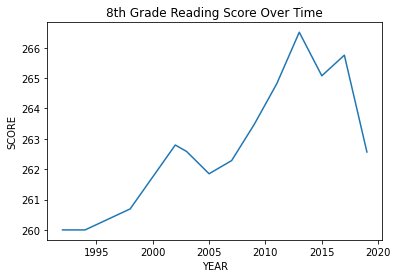

In [45]:
df.groupby('YEAR')["AVG_READING_8_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('8th Grade Reading Score Over Time')

8th Grade Reading score Over Time
Observation: Since early 1990s, 8th grade reading score steadily increases until 2013, while having a short term increase around 2000 to 2005. Since 2017, the score dramatically decreases.

**Visualization 2**

Text(0, 0.5, '8th Grade Reading Score')

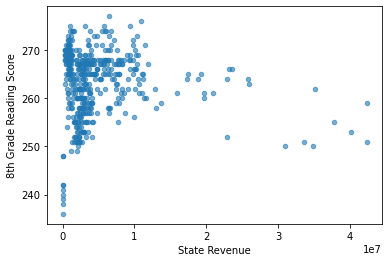

In [48]:
df.plot.scatter(x='STATE_REVENUE', y='AVG_READING_8_SCORE', alpha=0.6)
plt.xlabel('State Revenue')
plt.ylabel('8th Grade Reading Score')

State Revenue and Grade reading score of 8th grade
Observation: By observing the scatter plot, the 8th grade's reading score was likely to be high when the revenue is low. However, the graph does not give a clear relationship between those two variables.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = df[['ENROLL_8','AVG_MATH_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=4, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model = LinearRegression()

In [63]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
Least Squares Linear Agression

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

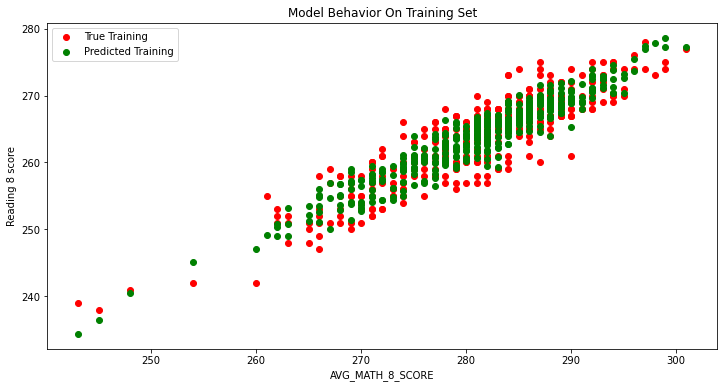

In [65]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train['AVG_MATH_8_SCORE'], y_train, color = "red")
plt.scatter(X_train['AVG_MATH_8_SCORE'], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel("AVG_MATH_8_SCORE")
plt.ylabel('Reading 8 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

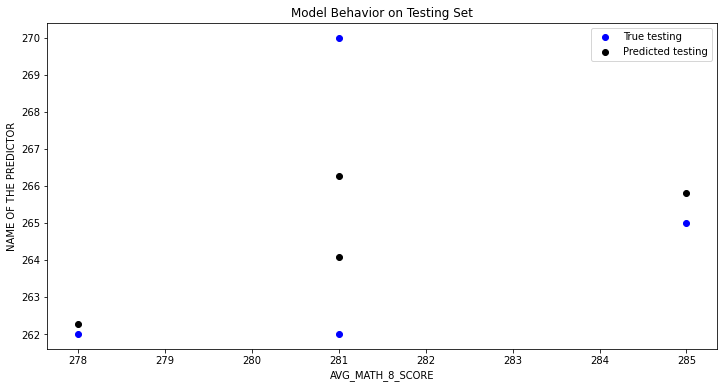

In [66]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test['AVG_MATH_8_SCORE'], y_test, color = "blue")
plt.scatter(X_test['AVG_MATH_8_SCORE'], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel('AVG_MATH_8_SCORE')
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

Since it was my first time using python and calculation statistical values with it, I was confused from the beginning. As I was working on it, I believe I am more familiarized with using python and manipulating with datas. From the last exercise of tutorial 1, I learned that predicted testing can be a lot differ from true testing. 